# Notebook for assessing video input parameters for tracker.py

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import trackpy as tp
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.animation as animation

import tracker
import stats
import visualizer
import utils

import importlib

(1024, 1024)


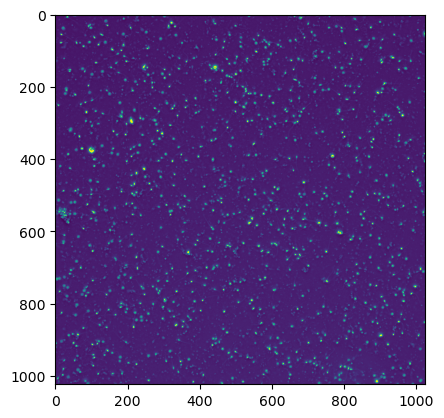

In [17]:
videofile = "C:/Users/cameron schmidt/Desktop/PyProj/ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

#convert to grayscale
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

print(gray.shape)

plt.imshow(gray)

## Import video and create a truncated grayscale series

           y           x         mass      size       ecc      signal  \
7   3.668915   56.183249   818.314339  1.478533  0.308289   97.516942   
11  4.148038  982.275597  1078.206190  1.572345  0.254702  108.096610   
14  4.834268  536.664967   902.031714  1.670453  0.201583   77.277577   
15  5.485491  662.601562   824.294152  1.510381  0.120984   94.297043   
25  7.437649   33.818507  1158.243680  1.654296  0.175415  103.036769   

    raw_mass        ep  
7     3373.0  0.018060  
11    4372.0  0.012422  
14    4020.0  0.013957  
15    3448.0  0.017464  
25    4614.0  0.011548  
                 y            x         mass        size         ecc  \
count   665.000000   665.000000   665.000000  665.000000  665.000000   
mean    504.275585   514.364049   972.311976    1.652427    0.168226   
std     289.122574   285.265303   129.254452    0.126921    0.097557   
min       3.668915     7.338557   750.236474    1.398287    0.005065   
25%     256.984685   271.187385   876.272522    1.5

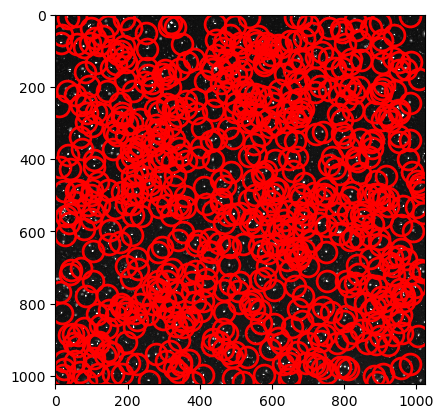

<AxesSubplot:>

In [69]:
f = tp.locate(gray, diameter=7, minmass=750, maxsize=2)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

print(f.head())

print(f.describe())

# Visualize
tp.annotate(f, gray)

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

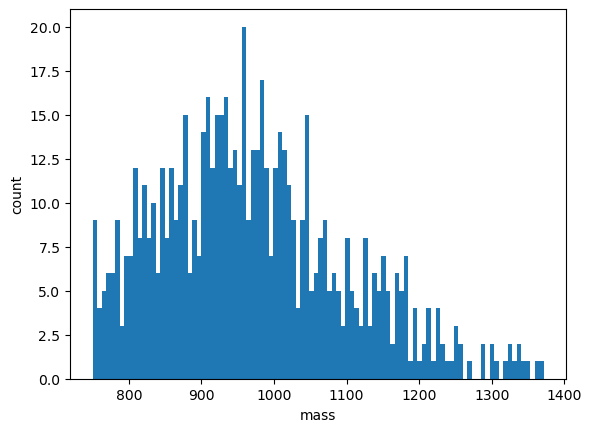

In [74]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=100)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

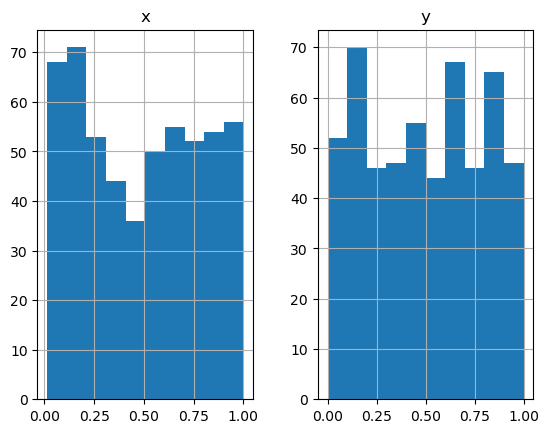

In [55]:
tp.subpx_bias(f)

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

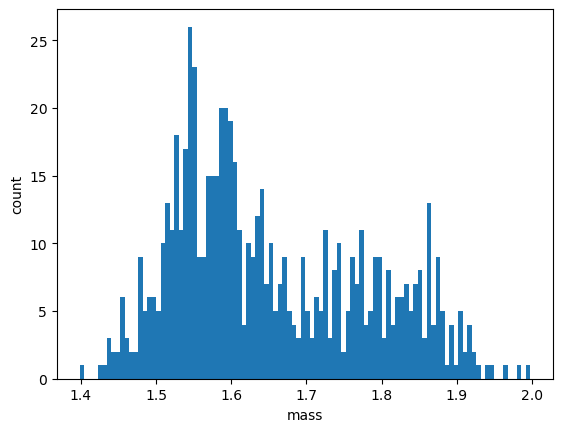

In [75]:
fig, ax = plt.subplots()
ax.hist(f['size'], bins=100)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')